In [47]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Read in the data
df_adult = pd.read_csv('adult.data', sep = ',', header = None)
df_abalone = pd.read_csv('abalone.data', sep = ',', header = None)
df_red_wine = pd.read_csv('winequality-red.csv', sep = ';')
df_white_wine = pd.read_csv('winequality-white.csv', sep = ';')

# Adult Dataset Setup

In [48]:
# Take the first 2000 so that it does not run forever
df_adult_2000 = df_adult.head(2000)

# one hot encode all categorical features
df_adult_one_hot = pd.get_dummies(df_adult_2000)

# Convert to binary classification problem by remove<=50K column
df_adult_final = df_adult_one_hot.drop(columns = '14_ <=50K')


In [4]:
# Function for generating partitions for trials
def generate_partitions(df):
    
    X = df.iloc[:,:-1]
    Y = df.iloc[:,-1]
    
    # Rescale the data
    X = preprocessing.minmax_scale(X, (-1,1))
    
    X_train_20, X_test_80 = train_test_split(X, test_size = .8, train_size = .2, shuffle = False)
    Y_train_20, Y_test_80 = train_test_split(Y, test_size = .8, train_size = .2, shuffle = False)
    
    X_train_50, X_test_50 = train_test_split(X, test_size = .5, train_size = .5, shuffle = False)
    Y_train_50, Y_test_50 = train_test_split(Y, test_size = .5, train_size = .5, shuffle = False)
    
    X_train_80, X_test_20 = train_test_split(X, test_size = .2, train_size = .8, shuffle = False)
    Y_train_80, Y_test_20 = train_test_split(Y, test_size = .2, train_size = .8, shuffle = False)
    
    return (X_train_20, X_test_80, Y_train_20, Y_test_80, X_train_50, X_test_50, 
            Y_train_50, Y_test_50, X_train_80, X_test_20, Y_train_80, Y_test_20)

In [5]:
# Shuffle the dataset 3 times
df_adult1 = shuffle(df_adult_final)
df_adult2 = shuffle(df_adult_final)
df_adult3 = shuffle(df_adult_final)

# Obtain all partitions
(adult1X_train_20, adult1X_test_80, adult1Y_train_20, adult1Y_test_80, adult1X_train_50, adult1X_test_50, 
 adult1Y_train_50, adult1Y_test_50, adult1X_train_80, adult1X_test_20, adult1Y_train_80, adult1Y_test_20) = generate_partitions(df_adult1)

(adult2X_train_20, adult2X_test_80, adult2Y_train_20, adult2Y_test_80, adult2X_train_50, adult2X_test_50, 
 adult2Y_train_50, adult2Y_test_50, adult2X_train_80, adult2X_test_20, adult2Y_train_80, adult2Y_test_20) = generate_partitions(df_adult2)

(adult3X_train_20, adult3X_test_80, adult3Y_train_20, adult3Y_test_80, adult3X_train_50, adult3X_test_50, 
 adult3Y_train_50, adult3Y_test_50, adult3X_train_80, adult3X_test_20, adult3Y_train_80, adult3Y_test_20) = generate_partitions(df_adult3)

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64.
  
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64.
  
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64.
  


# Linear SVM Adult Dataset

In [6]:
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [7]:
def run_lin_SVM(X_train, Y_train, X_test, Y_test):
    
    # parameters to search
    classifier = svm.LinearSVC(max_iter = 5000, dual = False)
    C_list = [10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e4, 10e5, 10e6, 10e7]

    # Cross validate
    grid = GridSearchCV(classifier, {'C': C_list}, n_jobs = -1, cv = 5, return_train_score = True, iid = False)
    grid.fit(X_train, Y_train)
    print(grid.best_params_)
    
    # draw heatmaps
    train_acc = grid.cv_results_['mean_train_score'].reshape(-1,1)
    draw_heatmap_linear(train_acc, 'train accuracy', C_list)
    val_acc   = grid.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap_linear(val_acc, 'val accuracy', C_list)
    
    # Calculate test accuracy
    train_score = grid.best_estimator_.score(X_train, Y_train)
    test_score = grid.best_estimator_.score(X_test, Y_test)
    return train_score, test_score

In [8]:
def run_SVM_trial(X_train, Y_train, X_test, Y_test):
    train_score, test_score = run_lin_SVM(X_train, Y_train, X_test, Y_test)
    print("Train score = " + str(train_score))
    print("Test score = " + str(test_score))
    return test_score

{'C': 0.1}


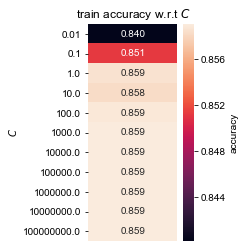

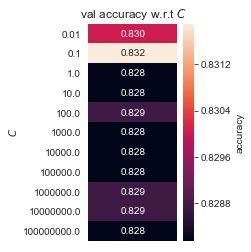

Train score = 0.85125
Test score = 0.8275
{'C': 1.0}


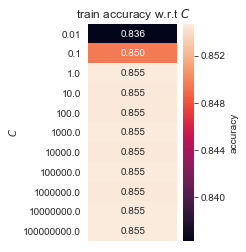

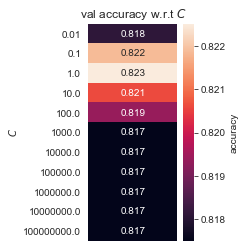

Train score = 0.851875
Test score = 0.8475
{'C': 100.0}


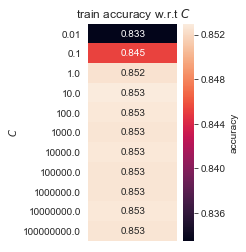

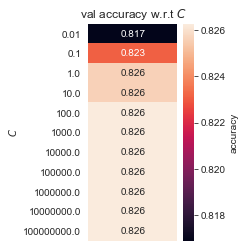

Train score = 0.851875
Test score = 0.8525
0.8424999999999999


In [9]:
# 3 Trials with 80/20 split
lin_SVM_80_20_score1 = run_SVM_trial(adult1X_train_80, adult1Y_train_80, adult1X_test_20, adult1Y_test_20)
lin_SVM_80_20_score2 = run_SVM_trial(adult2X_train_80, adult2Y_train_80, adult2X_test_20, adult2Y_test_20)
lin_SVM_80_20_score3 = run_SVM_trial(adult3X_train_80, adult3Y_train_80, adult3X_test_20, adult3Y_test_20)

avg_score_svm_80_20 = (lin_SVM_80_20_score1 + lin_SVM_80_20_score2 + lin_SVM_80_20_score3)/3
print(avg_score_svm_80_20)

{'C': 10.0}


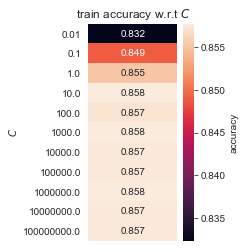

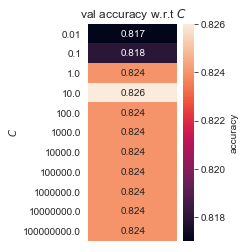

Train score = 0.857
Test score = 0.832
{'C': 0.1}


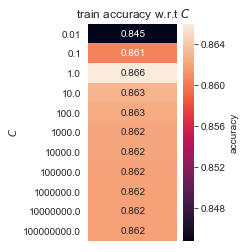

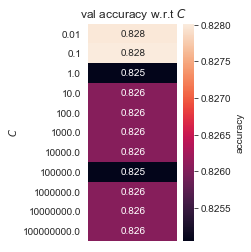

Train score = 0.864
Test score = 0.83
{'C': 100000.0}


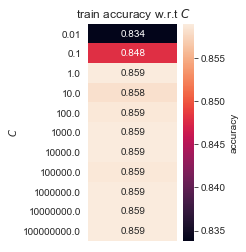

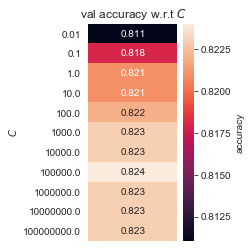

Train score = 0.854
Test score = 0.837
0.8329999999999999


In [10]:
# 3 Trials with 50/50 split
lin_SVM_50_50_score1 = run_SVM_trial(adult1X_train_50, adult1Y_train_50, adult1X_test_50, adult1Y_test_50)
lin_SVM_50_50_score2 = run_SVM_trial(adult2X_train_50, adult2Y_train_50, adult2X_test_50, adult2Y_test_50)
lin_SVM_50_50_score3 = run_SVM_trial(adult3X_train_50, adult3Y_train_50, adult3X_test_50, adult3Y_test_50)

avg_score_svm_50_50 = (lin_SVM_50_50_score1 + lin_SVM_50_50_score2 + lin_SVM_50_50_score3)/3
print(avg_score_svm_50_50)

{'C': 0.1}


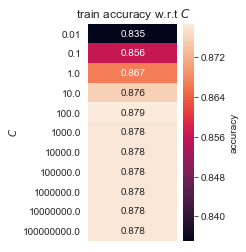

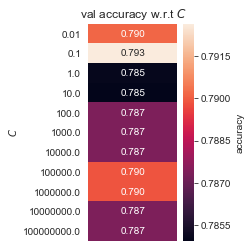

Train score = 0.8525
Test score = 0.80625
{'C': 0.01}


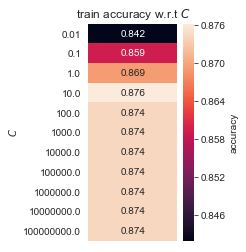

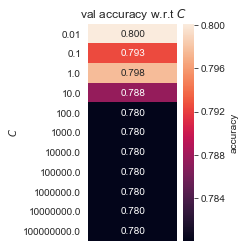

Train score = 0.8425
Test score = 0.79125
{'C': 0.1}


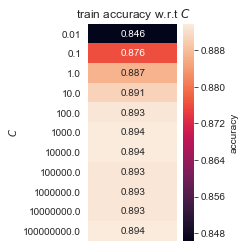

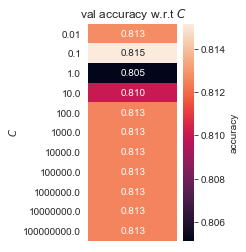

Train score = 0.8725
Test score = 0.811875
0.8031250000000001


In [11]:
# 3 Trials with 20/80 split
lin_SVM_20_80_score1 = run_SVM_trial(adult1X_train_20, adult1Y_train_20, adult1X_test_80, adult1Y_test_80)
lin_SVM_20_80_score2 = run_SVM_trial(adult2X_train_20, adult2Y_train_20, adult2X_test_80, adult2Y_test_80)
lin_SVM_20_80_score3 = run_SVM_trial(adult3X_train_20, adult3Y_train_20, adult3X_test_80, adult3Y_test_80)

avg_score_svm_20_80 = (lin_SVM_20_80_score1 + lin_SVM_20_80_score2 + lin_SVM_20_80_score3)/3
print(avg_score_svm_20_80)

# Decision Tree Adult Dataset

In [12]:
def draw_heatmap_DT(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [13]:
def run_DT(X_train, Y_train, X_test, Y_test):
    # Parameters to run
    classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
    depth_list = [1, 2, 3, 4 ,5, 6, 7, 8]
    grid = GridSearchCV(classifier, {'max_depth': depth_list},cv = 5, return_train_score = True, iid = False)
    grid.fit(X_train, Y_train)
    
    print(grid.best_params_)
    
    # Draw heat maps
    train_acc = grid.cv_results_['mean_train_score'].reshape(-1,1)
    draw_heatmap_DT(train_acc, 'train accuracy', depth_list)
    val_acc = grid.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap_DT(val_acc, 'val accuracy', depth_list)
    
    # Calculate test accuracy
    train_score = grid.best_estimator_.score(X_train, Y_train)
    test_score = grid.best_estimator_.score(X_test, Y_test)
    return train_score, test_score

In [14]:
def run_DT_trial(X_train, Y_train, X_test, Y_test):
    train_score, test_score = run_DT(X_train, Y_train, X_test, Y_test)
    print("Train score = " + str(train_score))
    print("Test score = " + str(test_score))
    return test_score

{'max_depth': 4}


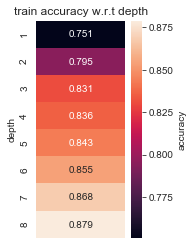

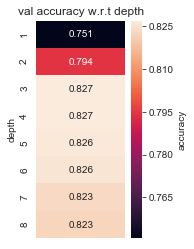

Train score = 0.839375
Test score = 0.8225
{'max_depth': 4}


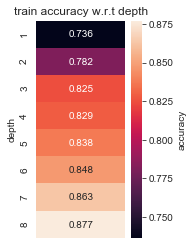

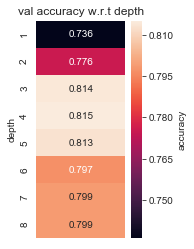

Train score = 0.8275
Test score = 0.8475
{'max_depth': 4}


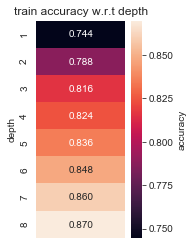

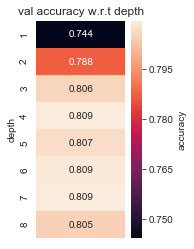

Train score = 0.823125
Test score = 0.8575
0.8424999999999999


In [15]:
# 3 Trials with 80/20 split
DT_80_20_score1 = run_DT_trial(adult1X_train_80, adult1Y_train_80, adult1X_test_20, adult1Y_test_20)
DT_80_20_score2 = run_DT_trial(adult2X_train_80, adult2Y_train_80, adult2X_test_20, adult2Y_test_20)
DT_80_20_score3 = run_DT_trial(adult3X_train_80, adult3Y_train_80, adult3X_test_20, adult3Y_test_20)

avg_score_DT_80_20 = (DT_80_20_score1 + DT_80_20_score2 + DT_80_20_score3)/3
print(avg_score_DT_80_20)

{'max_depth': 6}


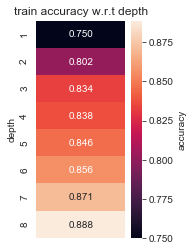

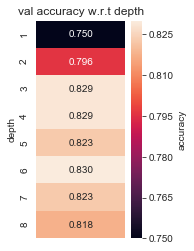

Train score = 0.844
Test score = 0.822
{'max_depth': 5}


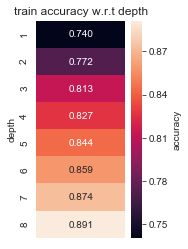

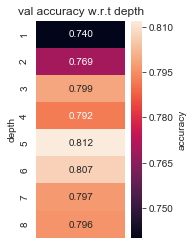

Train score = 0.831
Test score = 0.769
{'max_depth': 6}


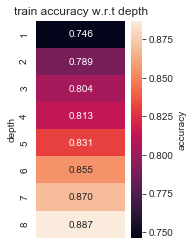

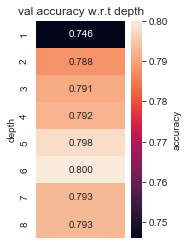

Train score = 0.853
Test score = 0.841
0.8106666666666666


In [16]:
# 3 Trials with 50/50 split
DT_50_50_score1 = run_DT_trial(adult1X_train_50, adult1Y_train_50, adult1X_test_50, adult1Y_test_50)
DT_50_50_score2 = run_DT_trial(adult2X_train_50, adult2Y_train_50, adult2X_test_50, adult2Y_test_50)
DT_50_50_score3 = run_DT_trial(adult3X_train_50, adult3Y_train_50, adult3X_test_50, adult3Y_test_50)

avg_score_DT_50_50 = (DT_50_50_score1 + DT_50_50_score2 + DT_50_50_score3)/3
print(avg_score_DT_50_50)

{'max_depth': 4}


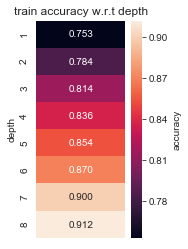

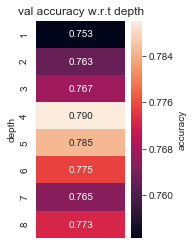

Train score = 0.825
Test score = 0.823125
{'max_depth': 3}


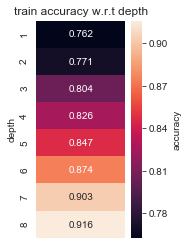

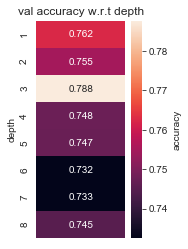

Train score = 0.805
Test score = 0.814375
{'max_depth': 8}


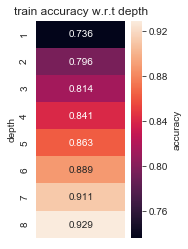

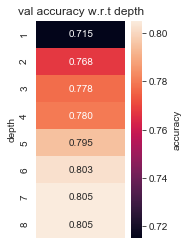

Train score = 0.9325
Test score = 0.76
0.7991666666666667


In [17]:
# 3 Trials with 20/80 split
DT_20_80_score1 = run_DT_trial(adult1X_train_20, adult1Y_train_20, adult1X_test_80, adult1Y_test_80)
DT_20_80_score2 = run_DT_trial(adult2X_train_20, adult2Y_train_20, adult2X_test_80, adult2Y_test_80)
DT_20_80_score3 = run_DT_trial(adult3X_train_20, adult3Y_train_20, adult3X_test_80, adult3Y_test_80)

avg_score_DT_20_80 = (DT_20_80_score1 + DT_20_80_score2 + DT_20_80_score3)/3
print(avg_score_DT_20_80)

# Random Forest Adult Dataset

In [18]:
def run_RF(X_train, Y_train, X_test, Y_test):
    classifier = ensemble.RandomForestClassifier()
    random_grid = {
        'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
    }
    rf_search = RandomizedSearchCV(classifier, random_grid, n_jobs = -1, cv = 5, iid = False, return_train_score = True)
    rf_search.fit(X_train, Y_train)
    
    print(rf_search.best_params_, rf_search.best_score_)
    
    train_score = rf_search.best_estimator_.score(X_train, Y_train)
    val_score = rf_search.best_score_
    test_score = rf_search.best_estimator_.score(X_test, Y_test)
    
    return train_score,val_score, test_score

In [19]:
def run_RF_trial(X_train, Y_train, X_test, Y_test):
    train_score, val_score, test_score = run_RF(X_train, Y_train, X_test, Y_test)
    print("Train score = " + str(train_score))
    print("Validation score = " + str(val_score))
    print("Test score = " + str(test_score))
    return test_score

In [20]:
# 3 trials with 80/20 split
RF_80_20_score1 = run_RF_trial(adult1X_train_80, adult1Y_train_80, adult1X_test_20, adult1Y_test_20)
RF_80_20_score2 = run_RF_trial(adult2X_train_80, adult2Y_train_80, adult2X_test_20, adult2Y_test_20)
RF_80_20_score3 = run_RF_trial(adult3X_train_80, adult3Y_train_80, adult3X_test_20, adult3Y_test_20)

avg_score_RF_80_20 = (RF_80_20_score1 + RF_80_20_score2 + RF_80_20_score3)/3
print(avg_score_RF_80_20)

{'n_estimators': 100, 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 50} 0.8443919496284142
Train score = 0.95375
Validation score = 0.8443919496284142
Test score = 0.8375
{'n_estimators': 800, 'min_samples_split': 8, 'max_features': 'sqrt', 'max_depth': 20} 0.8368620482133615
Train score = 0.93
Validation score = 0.8368620482133615
Test score = 0.855
{'n_estimators': 300, 'min_samples_split': 7, 'max_features': 'sqrt', 'max_depth': 10} 0.8306262878543735
Train score = 0.885625
Validation score = 0.8306262878543735
Test score = 0.86
0.8508333333333332


In [21]:
# 3 trials with 50/50 split
RF_50_50_score1 = run_RF_trial(adult1X_train_50, adult1Y_train_50, adult1X_test_50, adult1Y_test_50)
RF_50_50_score2 = run_RF_trial(adult2X_train_50, adult2Y_train_50, adult2X_test_50, adult2Y_test_50)
RF_50_50_score3 = run_RF_trial(adult3X_train_50, adult3Y_train_50, adult3X_test_50, adult3Y_test_50)

avg_score_RF_50_50 = (RF_50_50_score1 + RF_50_50_score2 + RF_50_50_score3)/3
print(avg_score_RF_50_50)

{'n_estimators': 900, 'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 50} 0.8319999999999999
Train score = 0.956
Validation score = 0.8319999999999999
Test score = 0.831
{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 20} 0.836961624040601
Train score = 0.935
Validation score = 0.836961624040601
Test score = 0.85
{'n_estimators': 900, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10} 0.8280082002050051
Train score = 0.921
Validation score = 0.8280082002050051
Test score = 0.845
0.842


In [22]:
# 3 trials with 20/80 split
RF_20_80_score1 = run_RF_trial(adult1X_train_20, adult1Y_train_20, adult1X_test_80, adult1Y_test_80)
RF_20_80_score2 = run_RF_trial(adult2X_train_20, adult2Y_train_20, adult2X_test_80, adult2Y_test_80)
RF_20_80_score3 = run_RF_trial(adult3X_train_20, adult3Y_train_20, adult3X_test_80, adult3Y_test_80)

avg_score_RF_20_80 = (RF_20_80_score1 + RF_20_80_score2 + RF_20_80_score3)/3
print(avg_score_RF_20_80)

{'n_estimators': 300, 'min_samples_split': 8, 'max_features': 'sqrt', 'max_depth': 10} 0.8276465072667605
Train score = 0.9075
Validation score = 0.8276465072667605
Test score = 0.829375
{'n_estimators': 700, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 20} 0.802550007813721
Train score = 0.9325
Validation score = 0.802550007813721
Test score = 0.82375
{'n_estimators': 500, 'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 80} 0.8426179871854977
Train score = 0.9625
Validation score = 0.8426179871854977
Test score = 0.821875
0.8250000000000001


# Wine Quality Dataset Setup

In [23]:
# Concatenate the red wine and white wine datasets
df_wine = pd.concat([df_red_wine, df_white_wine])

# Turn the dataset into binary class
df_wine['quality >5'] = df_wine['quality'] > 5
df_wine = df_wine.drop(columns = 'quality', axis = 1)
df_wine['quality >5'].replace(True, 1, inplace = True)

# Balance the data into a 2000 entry set with equal halves
df_wine_true = df_wine[df_wine['quality >5'] == 1.0].head(1000)
df_wine_false = df_wine[df_wine['quality >5'] == 0.0].head(1000)
df_wine_final = pd.concat([df_wine_true, df_wine_false])




In [24]:
# Shuffle dataset three times
df_wine_1 = shuffle(df_wine_final)
df_wine_2 = shuffle(df_wine_final)
df_wine_3 = shuffle(df_wine_final)

# Obtain all partitions
(wine1X_train_20, wine1X_test_80, wine1Y_train_20, wine1Y_test_80, wine1X_train_50, wine1X_test_50, 
 wine1Y_train_50, wine1Y_test_50, wine1X_train_80, wine1X_test_20, wine1Y_train_80, wine1Y_test_20) = generate_partitions(df_wine_1)

(wine2X_train_20, wine2X_test_80, wine2Y_train_20, wine2Y_test_80, wine2X_train_50, wine2X_test_50, 
 wine2Y_train_50, wine2Y_test_50, wine2X_train_80, wine2X_test_20, wine2Y_train_80, wine2Y_test_20) = generate_partitions(df_wine_2)

(wine3X_train_20, wine3X_test_80, wine3Y_train_20, wine3Y_test_80, wine3X_train_50, wine3X_test_50, 
 wine3Y_train_50, wine3Y_test_50, wine3X_train_80, wine3X_test_20, wine3Y_train_80, wine3Y_test_20) = generate_partitions(df_wine_3)


# Linear SVM Wine Quality Dataset

{'C': 0.1}


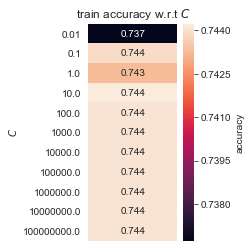

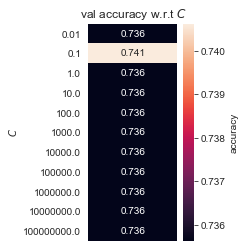

Train score = 0.74
Test score = 0.6825
{'C': 10.0}


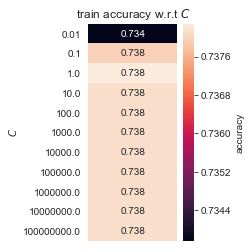

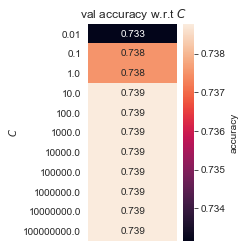

Train score = 0.744375
Test score = 0.725
{'C': 0.1}


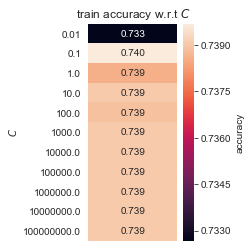

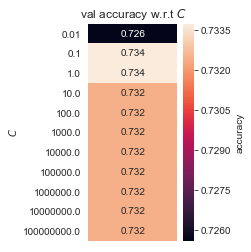

Train score = 0.73875
Test score = 0.7275
0.7116666666666666


In [46]:
# 3 Trials with 80/20 split
wine_SVM_80_20_score1 = run_SVM_trial(wine1X_train_80, wine1Y_train_80, wine1X_test_20, wine1Y_test_20)
wine_SVM_80_20_score2 = run_SVM_trial(wine2X_train_80, wine2Y_train_80, wine2X_test_20, wine2Y_test_20)
wine_SVM_80_20_score3 = run_SVM_trial(wine3X_train_80, wine3Y_train_80, wine3X_test_20, wine3Y_test_20)

avg_score_wine_svm_80_20 = (wine_SVM_80_20_score1 + wine_SVM_80_20_score2 + wine_SVM_80_20_score3)/3
print(avg_score_wine_svm_80_20)

{'C': 0.01}


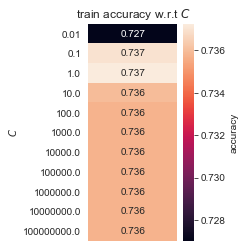

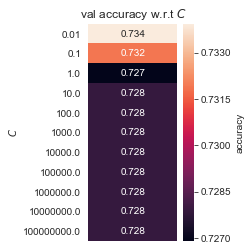

Train score = 0.731
Test score = 0.729
{'C': 100.0}


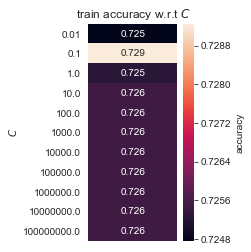

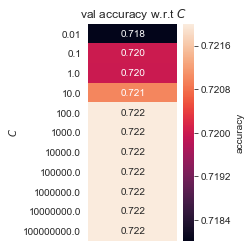

Train score = 0.73
Test score = 0.739
{'C': 1.0}


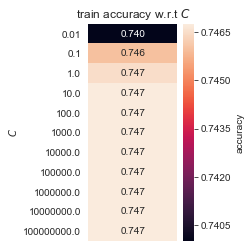

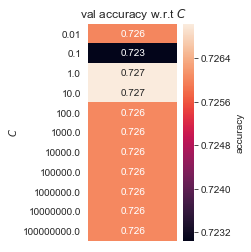

Train score = 0.735
Test score = 0.731
0.733


In [26]:
# 3 Trials with 50/50 split
wine_SVM_50_50_score1 = run_SVM_trial(wine1X_train_50, wine1Y_train_50, wine1X_test_50, wine1Y_test_50)
wine_SVM_50_50_score2 = run_SVM_trial(wine2X_train_50, wine2Y_train_50, wine2X_test_50, wine2Y_test_50)
wine_SVM_50_50_score3 = run_SVM_trial(wine3X_train_50, wine3Y_train_50, wine3X_test_50, wine3Y_test_50)

avg_score_wine_svm_50_50 = (wine_SVM_50_50_score1 + wine_SVM_50_50_score2 + wine_SVM_50_50_score3)/3
print(avg_score_wine_svm_50_50)

{'C': 1.0}


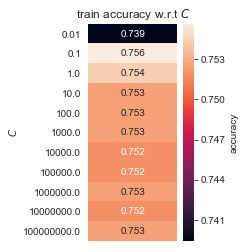

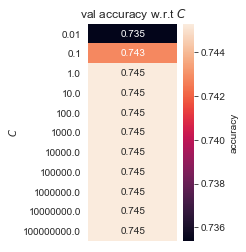

Train score = 0.75
Test score = 0.72125
{'C': 0.1}


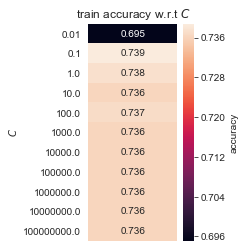

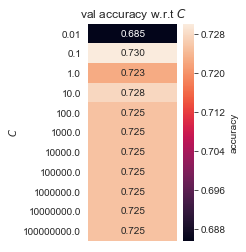

Train score = 0.745
Test score = 0.72
{'C': 0.1}


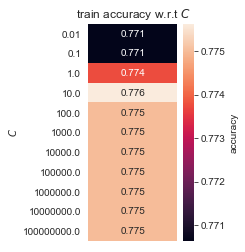

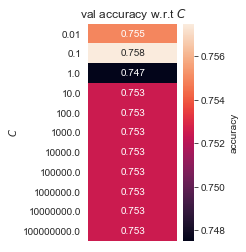

Train score = 0.7725
Test score = 0.715625
0.7189583333333333


In [27]:
# 3 Trials with 20/80 split
wine_SVM_20_80_score1 = run_SVM_trial(wine1X_train_20, wine1Y_train_20, wine1X_test_80, wine1Y_test_80)
wine_SVM_20_80_score2 = run_SVM_trial(wine2X_train_20, wine2Y_train_20, wine2X_test_80, wine2Y_test_80)
wine_SVM_20_80_score3 = run_SVM_trial(wine3X_train_20, wine3Y_train_20, wine3X_test_80, wine3Y_test_80)

avg_score_wine_svm_20_80 = (wine_SVM_20_80_score1 + wine_SVM_20_80_score2 + wine_SVM_20_80_score3)/3
print(avg_score_wine_svm_20_80)

# Decision Tree Wine Quality Dataset

{'max_depth': 4}


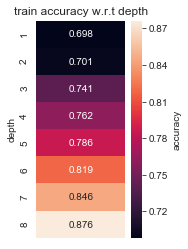

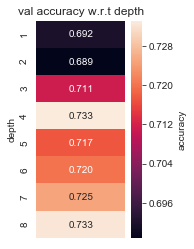

Train score = 0.75125
Test score = 0.69
{'max_depth': 7}


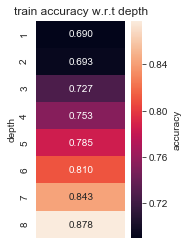

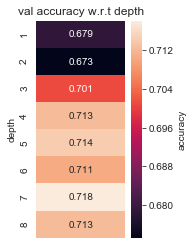

Train score = 0.83625
Test score = 0.7125
{'max_depth': 7}


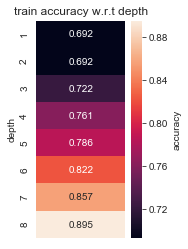

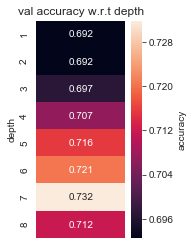

Train score = 0.841875
Test score = 0.7225
0.7083333333333334


In [28]:
# 3 Trials with 80/20 split
wine_DT_80_20_score1 = run_DT_trial(wine1X_train_80, wine1Y_train_80, wine1X_test_20, wine1Y_test_20)
wine_DT_80_20_score2 = run_DT_trial(wine2X_train_80, wine2Y_train_80, wine2X_test_20, wine2Y_test_20)
wine_DT_80_20_score3 = run_DT_trial(wine3X_train_80, wine3Y_train_80, wine3X_test_20, wine3Y_test_20)

avg_score_wine_DT_80_20 = (wine_DT_80_20_score1 + wine_DT_80_20_score2 + wine_DT_80_20_score3)/3
print(avg_score_wine_DT_80_20)

{'max_depth': 7}


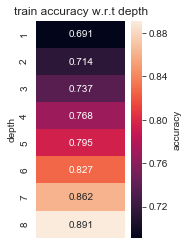

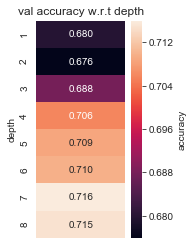

Train score = 0.852
Test score = 0.695
{'max_depth': 8}


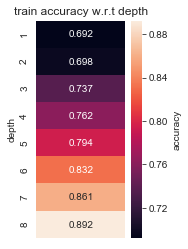

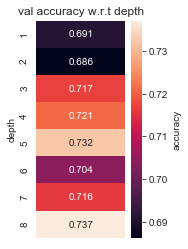

Train score = 0.892
Test score = 0.709
{'max_depth': 6}


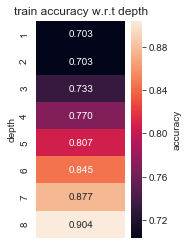

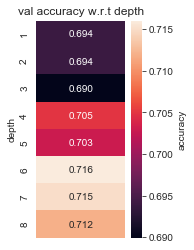

Train score = 0.844
Test score = 0.694
0.6993333333333333


In [29]:
wine_DT_50_50_score1 = run_DT_trial(wine1X_train_50, wine1Y_train_50, wine1X_test_50, wine1Y_test_50)
wine_DT_50_50_score2 = run_DT_trial(wine2X_train_50, wine2Y_train_50, wine2X_test_50, wine2Y_test_50)
wine_DT_50_50_score3 = run_DT_trial(wine3X_train_50, wine3Y_train_50, wine3X_test_50, wine3Y_test_50)

avg_score_wine_DT_50_50 = (wine_DT_50_50_score1 + wine_DT_50_50_score2 + wine_DT_50_50_score3)/3
print(avg_score_wine_DT_50_50)

{'max_depth': 5}


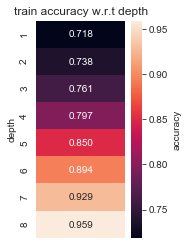

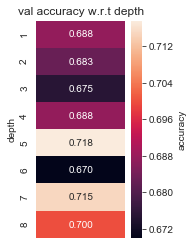

Train score = 0.8425
Test score = 0.724375
{'max_depth': 6}


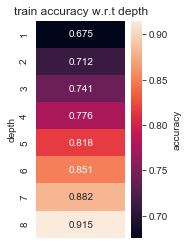

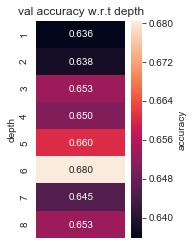

Train score = 0.8375
Test score = 0.68
{'max_depth': 1}


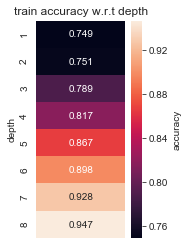

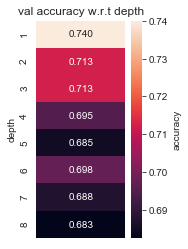

Train score = 0.7475
Test score = 0.6775
0.6939583333333333


In [30]:
wine_DT_20_80_score1 = run_DT_trial(wine1X_train_20, wine1Y_train_20, wine1X_test_80, wine1Y_test_80)
wine_DT_20_80_score2 = run_DT_trial(wine2X_train_20, wine2Y_train_20, wine2X_test_80, wine2Y_test_80)
wine_DT_20_80_score3 = run_DT_trial(wine3X_train_20, wine3Y_train_20, wine3X_test_80, wine3Y_test_80)

avg_score_wine_DT_20_80 = (wine_DT_20_80_score1 + wine_DT_20_80_score2 + wine_DT_20_80_score3)/3
print(avg_score_wine_DT_20_80)

# Random Forest Wine Quality Dataset

In [31]:
wine_RF_80_20_score1 = run_RF_trial(wine1X_train_80, wine1Y_train_80, wine1X_test_20, wine1Y_test_20)
wine_RF_80_20_score2 = run_RF_trial(wine2X_train_80, wine2Y_train_80, wine2X_test_20, wine2Y_test_20)
wine_RF_80_20_score3 = run_RF_trial(wine3X_train_80, wine3Y_train_80, wine3X_test_20, wine3Y_test_20)

avg_score_wine_RF_80_20 = (wine_RF_80_20_score1 + wine_RF_80_20_score2 + wine_RF_80_20_score3)/3
print(avg_score_wine_RF_80_20)

{'n_estimators': 900, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 40} 0.8087433898280256
Train score = 1.0
Validation score = 0.8087433898280256
Test score = 0.81
{'n_estimators': 900, 'min_samples_split': 3, 'max_features': 'auto', 'max_depth': 30} 0.8056281372376682
Train score = 1.0
Validation score = 0.8056281372376682
Test score = 0.82
{'n_estimators': 800, 'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 70} 0.8049347466772137
Train score = 0.9925
Validation score = 0.8049347466772137
Test score = 0.8375
0.8224999999999999


In [32]:
wine_RF_50_50_score1 = run_RF_trial(wine1X_train_50, wine1Y_train_50, wine1X_test_50, wine1Y_test_50)
wine_RF_50_50_score2 = run_RF_trial(wine2X_train_50, wine2Y_train_50, wine2X_test_50, wine2Y_test_50)
wine_RF_50_50_score3 = run_RF_trial(wine3X_train_50, wine3Y_train_50, wine3X_test_50, wine3Y_test_50)

avg_score_wine_RF_50_50 = (wine_RF_50_50_score1 + wine_RF_50_50_score2 + wine_RF_50_50_score3)/3
print(avg_score_wine_RF_50_50)

{'n_estimators': 600, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 50} 0.7779205230130752
Train score = 1.0
Validation score = 0.7779205230130752
Test score = 0.795
{'n_estimators': 1000, 'min_samples_split': 3, 'max_features': 'auto', 'max_depth': 80} 0.7760524763119079
Train score = 1.0
Validation score = 0.7760524763119079
Test score = 0.784
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 30} 0.7939677491937298
Train score = 1.0
Validation score = 0.7939677491937298
Test score = 0.772
0.7836666666666666


In [33]:
wine_RF_20_80_score1 = run_RF_trial(wine1X_train_20, wine1Y_train_20, wine1X_test_80, wine1Y_test_80)
wine_RF_20_80_score2 = run_RF_trial(wine2X_train_20, wine2Y_train_20, wine2X_test_80, wine2Y_test_80)
wine_RF_20_80_score3 = run_RF_trial(wine3X_train_20, wine3Y_train_20, wine3X_test_80, wine3Y_test_80)

avg_score_wine_RF_20_80 = (wine_RF_20_80_score1 + wine_RF_20_80_score2 + wine_RF_20_80_score3)/3
print(avg_score_wine_RF_20_80)

{'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 60} 0.7876109548366932
Train score = 0.965
Validation score = 0.7876109548366932
Test score = 0.73
{'n_estimators': 400, 'min_samples_split': 4, 'max_features': 'auto', 'max_depth': None} 0.7456262697296452
Train score = 1.0
Validation score = 0.7456262697296452
Test score = 0.748125
{'n_estimators': 300, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 70} 0.765
Train score = 1.0
Validation score = 0.765
Test score = 0.735625
0.7379166666666667


# Abalone Dataset Setup

In [34]:
# Transform into binary classification
df_abalone[8] = df_abalone[8] >= 10
df_abalone[8].replace(True, 1, inplace = True)

# One hot encode 
df_abalone_onehot = pd.get_dummies(df_abalone)

# Rearrange columns
df_abalone_final = df_abalone_onehot[['0_F','0_I','0_M',1,2,3,4,5,6,7,8]]

In [35]:
# Shuffle the dataset 3 times
df_abalone1 = shuffle(df_abalone_final)
df_abalone2 = shuffle(df_abalone_final)
df_abalone3 = shuffle(df_abalone_final)

# Obtain all partitions
(abalone1X_train_20, abalone1X_test_80, abalone1Y_train_20, abalone1Y_test_80, abalone1X_train_50, abalone1X_test_50, 
 abalone1Y_train_50, abalone1Y_test_50, abalone1X_train_80, abalone1X_test_20, abalone1Y_train_80, abalone1Y_test_20) = generate_partitions(df_abalone1)

(abalone2X_train_20, abalone2X_test_80, abalone2Y_train_20, abalone2Y_test_80, abalone2X_train_50, abalone2X_test_50, 
 abalone2Y_train_50, abalone2Y_test_50, abalone2X_train_80, abalone2X_test_20, abalone2Y_train_80, abalone2Y_test_20) = generate_partitions(df_abalone2)

(abalone3X_train_20, abalone3X_test_80, abalone3Y_train_20, abalone3Y_test_80, abalone3X_train_50, abalone3X_test_50, 
 abalone3Y_train_50, abalone3Y_test_50, abalone3X_train_80, abalone3X_test_20, abalone3Y_train_80, abalone3Y_test_20) = generate_partitions(df_abalone3)


C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64.
  
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64.
  
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64.
  


# Linear SVM Abalone Dataset

{'C': 100.0}


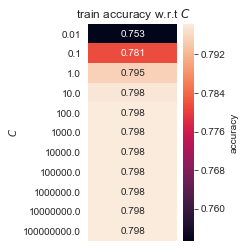

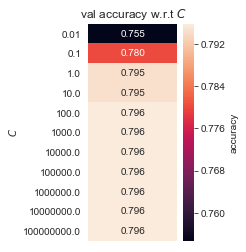

Train score = 0.798263992816522
Test score = 0.7595693779904307
{'C': 10.0}


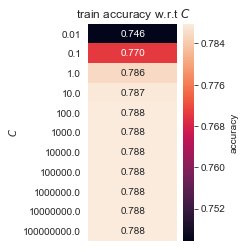

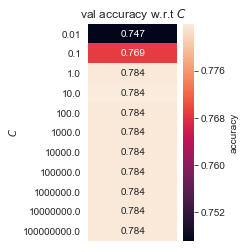

Train score = 0.7889853337324154
Test score = 0.7978468899521531
{'C': 10.0}


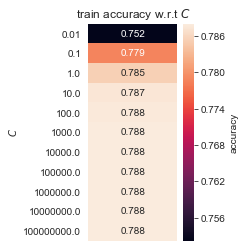

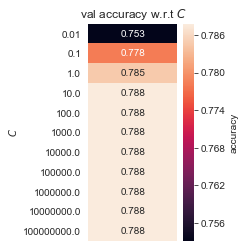

Train score = 0.7886860221490571
Test score = 0.7930622009569378
0.7834928229665072


In [36]:
# 3 Trials with 80/20 split
aba_SVM_80_20_score1 = run_SVM_trial(abalone1X_train_80, abalone1Y_train_80, abalone1X_test_20, abalone1Y_test_20)
aba_SVM_80_20_score2 = run_SVM_trial(abalone2X_train_80, abalone2Y_train_80, abalone2X_test_20, abalone2Y_test_20)
aba_SVM_80_20_score3 = run_SVM_trial(abalone3X_train_80, abalone3Y_train_80, abalone3X_test_20, abalone3Y_test_20)

avg_score_aba_svm_80_20 = (aba_SVM_80_20_score1 + aba_SVM_80_20_score2 + aba_SVM_80_20_score3)/3
print(avg_score_aba_svm_80_20)

{'C': 10.0}


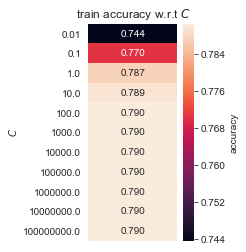

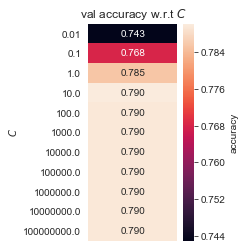

Train score = 0.7907088122605364
Test score = 0.7898516036381044
{'C': 10.0}


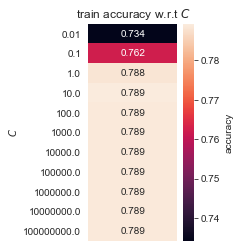

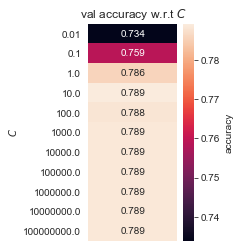

Train score = 0.7921455938697318
Test score = 0.7903303015797032
{'C': 10.0}


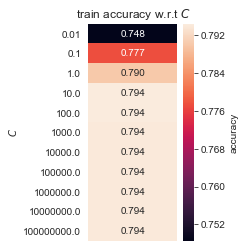

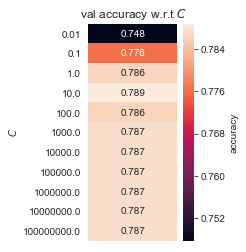

Train score = 0.7926245210727969
Test score = 0.7836285303973193
0.7879368118717088


In [37]:
# 3 Trials with 50/50 split
aba_SVM_50_50_score1 = run_SVM_trial(abalone1X_train_50, abalone1Y_train_50, abalone1X_test_50, abalone1Y_test_50)
aba_SVM_50_50_score2 = run_SVM_trial(abalone2X_train_50, abalone2Y_train_50, abalone2X_test_50, abalone2Y_test_50)
aba_SVM_50_50_score3 = run_SVM_trial(abalone3X_train_50, abalone3Y_train_50, abalone3X_test_50, abalone3Y_test_50)

avg_score_aba_svm_50_50 = (aba_SVM_50_50_score1 + aba_SVM_50_50_score2 + aba_SVM_50_50_score3)/3
print(avg_score_aba_svm_50_50)

{'C': 10.0}


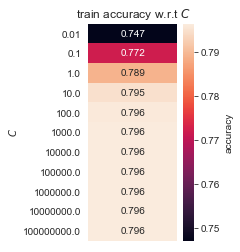

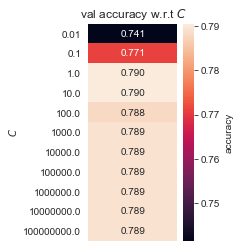

Train score = 0.7964071856287425
Test score = 0.7857570317175344
{'C': 10.0}


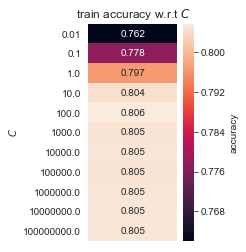

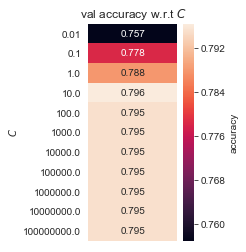

Train score = 0.8035928143712575
Test score = 0.7890484739676841
{'C': 1.0}


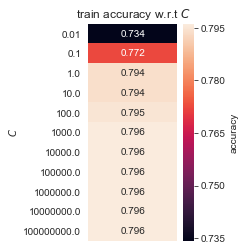

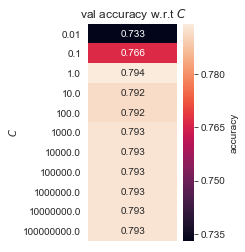

Train score = 0.7940119760479042
Test score = 0.7845601436265709
0.7864552164372632


In [38]:
# 3 Trials with 20/80 split
aba_SVM_20_80_score1 = run_SVM_trial(abalone1X_train_20, abalone1Y_train_20, abalone1X_test_80, abalone1Y_test_80)
aba_SVM_20_80_score2 = run_SVM_trial(abalone2X_train_20, abalone2Y_train_20, abalone2X_test_80, abalone2Y_test_80)
aba_SVM_20_80_score3 = run_SVM_trial(abalone3X_train_20, abalone3Y_train_20, abalone3X_test_80, abalone3Y_test_80)

avg_score_aba_svm_20_80 = (aba_SVM_20_80_score1 + aba_SVM_20_80_score2 + aba_SVM_20_80_score3)/3
print(avg_score_aba_svm_20_80)

# Decision Tree Abalone Datset

{'max_depth': 5}


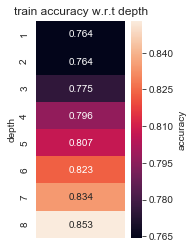

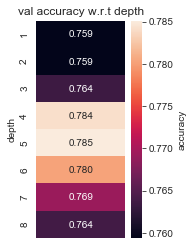

Train score = 0.8009577970667465
Test score = 0.7559808612440191
{'max_depth': 6}


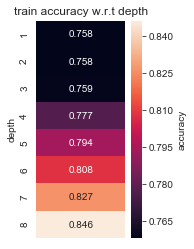

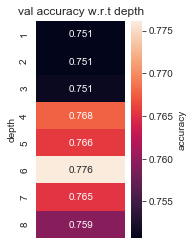

Train score = 0.8084405866507034
Test score = 0.7870813397129187
{'max_depth': 5}


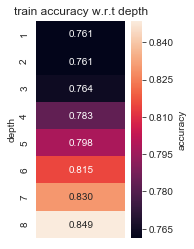

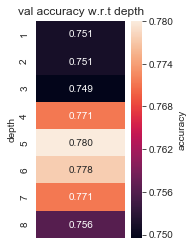

Train score = 0.8006584854833882
Test score = 0.7954545454545454
0.779505582137161


In [39]:
# 3 Trials with 80/20 split
aba_DT_80_20_score1 = run_DT_trial(abalone1X_train_80, abalone1Y_train_80, abalone1X_test_20, abalone1Y_test_20)
aba_DT_80_20_score2 = run_DT_trial(abalone2X_train_80, abalone2Y_train_80, abalone2X_test_20, abalone2Y_test_20)
aba_DT_80_20_score3 = run_DT_trial(abalone3X_train_80, abalone3Y_train_80, abalone3X_test_20, abalone3Y_test_20)

avg_score_aba_DT_80_20 = (aba_DT_80_20_score1 + aba_DT_80_20_score2 + aba_DT_80_20_score3)/3
print(avg_score_aba_DT_80_20)

{'max_depth': 6}


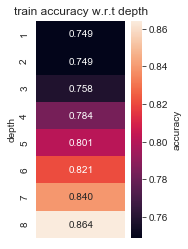

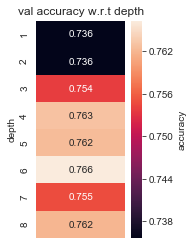

Train score = 0.8204022988505747
Test score = 0.7687888942077549
{'max_depth': 5}


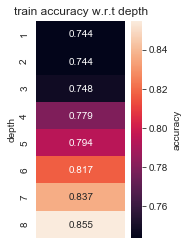

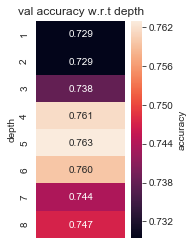

Train score = 0.7921455938697318
Test score = 0.7802776448061274
{'max_depth': 5}


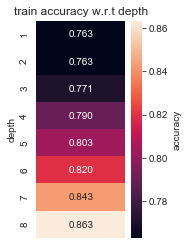

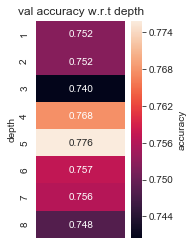

Train score = 0.7978927203065134
Test score = 0.7735758736237435
0.7742141375458752


In [40]:
# 3 Trials with 50/50 split
aba_DT_50_50_score1 = run_DT_trial(abalone1X_train_50, abalone1Y_train_50, abalone1X_test_50, abalone1Y_test_50)
aba_DT_50_50_score2 = run_DT_trial(abalone2X_train_50, abalone2Y_train_50, abalone2X_test_50, abalone2Y_test_50)
aba_DT_50_50_score3 = run_DT_trial(abalone3X_train_50, abalone3Y_train_50, abalone3X_test_50, abalone3Y_test_50)

avg_score_aba_DT_50_50 = (aba_DT_50_50_score1 + aba_DT_50_50_score2 + aba_DT_50_50_score3)/3
print(avg_score_aba_DT_50_50)

{'max_depth': 4}


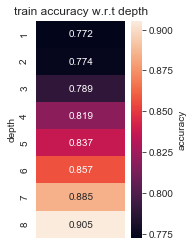

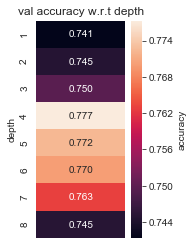

Train score = 0.8155688622754491
Test score = 0.7669060442848593
{'max_depth': 6}


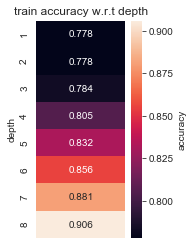

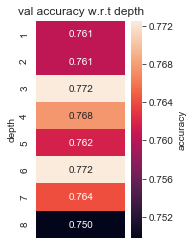

Train score = 0.8455089820359282
Test score = 0.755834829443447
{'max_depth': 7}


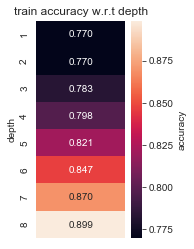

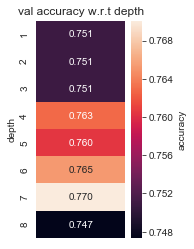

Train score = 0.8766467065868263
Test score = 0.7567324955116697
0.7598244564133253


In [41]:
# 3 Trials with 20/80 split
aba_DT_20_80_score1 = run_DT_trial(abalone1X_train_20, abalone1Y_train_20, abalone1X_test_80, abalone1Y_test_80)
aba_DT_20_80_score2 = run_DT_trial(abalone2X_train_20, abalone2Y_train_20, abalone2X_test_80, abalone2Y_test_80)
aba_DT_20_80_score3 = run_DT_trial(abalone3X_train_20, abalone3Y_train_20, abalone3X_test_80, abalone3Y_test_80)

avg_score_aba_DT_20_80 = (aba_DT_20_80_score1 + aba_DT_20_80_score2 + aba_DT_20_80_score3)/3
print(avg_score_aba_DT_20_80)

# Random Forests Abalone Dataset

In [42]:
# Random Forest with 80/20 split
aba_RF_80_20_score1 = run_RF_trial(abalone1X_train_80, abalone1Y_train_80, abalone1X_test_20, abalone1Y_test_20)
aba_RF_80_20_score2 = run_RF_trial(abalone2X_train_80, abalone2Y_train_80, abalone2X_test_20, abalone2Y_test_20)
aba_RF_80_20_score3 = run_RF_trial(abalone3X_train_80, abalone3Y_train_80, abalone3X_test_20, abalone3Y_test_20)

avg_score_aba_RF_80_20 = (aba_RF_80_20_score1 + aba_RF_80_20_score2 + aba_RF_80_20_score3)/3
print(avg_score_aba_RF_80_20)

{'n_estimators': 300, 'min_samples_split': 9, 'max_features': 'sqrt', 'max_depth': 60} 0.8003571332670981
Train score = 0.9524094582460341
Validation score = 0.8003571332670981
Test score = 0.7715311004784688
{'n_estimators': 300, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 10} 0.7892961262179254
Train score = 0.9057168512421431
Validation score = 0.7892961262179254
Test score = 0.8110047846889952
{'n_estimators': 400, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': None} 0.7925875627208818
Train score = 0.9446273570787189
Validation score = 0.7925875627208818
Test score = 0.7966507177033493
0.7930622009569378


In [43]:
# Random Forest with 50/50 split
aba_RF_50_50_score1 = run_RF_trial(abalone1X_train_50, abalone1Y_train_50, abalone1X_test_50, abalone1Y_test_50)
aba_RF_50_50_score2 = run_RF_trial(abalone2X_train_50, abalone2Y_train_50, abalone2X_test_50, abalone2Y_test_50)
aba_RF_50_50_score3 = run_RF_trial(abalone3X_train_50, abalone3Y_train_50, abalone3X_test_50, abalone3Y_test_50)

avg_score_aba_RF_50_50 = (aba_RF_50_50_score1 + aba_RF_50_50_score2 + aba_RF_50_50_score3)/3
print(avg_score_aba_RF_50_50)

{'n_estimators': 600, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 100} 0.8026661476770325
Train score = 0.9415708812260536
Validation score = 0.8026661476770325
Test score = 0.7932024892292963
{'n_estimators': 100, 'min_samples_split': 8, 'max_features': 'auto', 'max_depth': 90} 0.7892751827246337
Train score = 0.9616858237547893
Validation score = 0.7892751827246337
Test score = 0.791287697462901
{'n_estimators': 600, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 40} 0.7887944190102464
Train score = 1.0
Validation score = 0.7887944190102464
Test score = 0.7884155098133078
0.790968565501835


In [44]:
# Random Forest with 20/80 split
aba_RF_20_80_score1 = run_RF_trial(abalone1X_train_20, abalone1Y_train_20, abalone1X_test_80, abalone1Y_test_80)
aba_RF_20_80_score2 = run_RF_trial(abalone2X_train_20, abalone2Y_train_20, abalone2X_test_80, abalone2Y_test_80)
aba_RF_20_80_score3 = run_RF_trial(abalone3X_train_20, abalone3Y_train_20, abalone3X_test_80, abalone3Y_test_80)

avg_score_aba_RF_20_80 = (aba_RF_20_80_score1 + aba_RF_20_80_score2 + aba_RF_20_80_score3)/3
print(avg_score_aba_RF_20_80)

{'n_estimators': 600, 'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 70} 0.8012207942119204
Train score = 0.9736526946107784
Validation score = 0.8012207942119204
Test score = 0.7887492519449432
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 90} 0.8131825849162262
Train score = 1.0
Validation score = 0.8131825849162262
Test score = 0.7803710353081987
{'n_estimators': 400, 'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 90} 0.7964071856287426
Train score = 0.9664670658682635
Validation score = 0.7964071856287426
Test score = 0.7941352483542788
0.7877518452024735
